In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("F:\MIS\DEPI Data analysis coures\graduition project\Datasets\Superstore Sales Dataset.csv")


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\ELSHEAKH\AppData\Local\Temp\ipykernel_9660\1807331804.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("F:\MIS\DEPI Data analysis coures\graduition project\Datasets\Superstore Sales Dataset.csv")


In [10]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [14]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [20]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [30]:
median_value = df['Postal Code'].median()
df['Postal Code'].fillna(median_value, inplace = True)

In [32]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [40]:
if df.duplicated().sum() >0:
    print("Duplicates are present")
else:
    print("No Duplicates exist")

No Duplicates exist


In [66]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]
print("Outliers in Sales:")
print(lower_bound)
print(upper_bound)
print(outliers)

Outliers in Sales:
-272.7875000000001
500.6405000000001
      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
7          8  CA-2015-115812  09/06/2015  14/06/2015  Standard Class   
10        11  CA-2015-115812  09/06/2015  14/06/2015  Standard Class   
11        12  CA-2015-115812  09/06/2015  14/06/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9759    9760  CA-2017-146913  31/10/2017  05/11/2017  Standard Class   
9774    9775  CA-2015-169019  26/07/2015  30/07/2015  Standard Class   
9781    9782  CA-2017-153178  14/09/2017  18/09/2017  Standard Class   
9787    9788  CA-2018-144491  27/03/2018  01/04/2018  Standard Class   
9788    9789  CA-2018-144491  27/03/2018  01/04/2018  Standard Class   

     Customer ID    Customer Name    Segment        Country             City  \

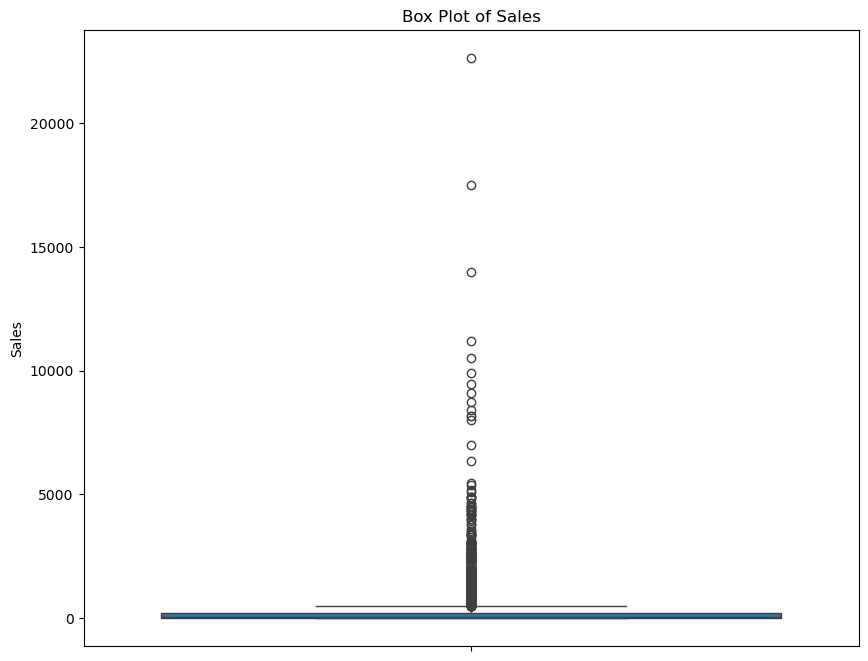

In [70]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='Sales')
plt.title('Box Plot of Sales')
plt.ylabel('Sales')
plt.show()

In [76]:
df.to_csv("Output . csv" , index=False)